In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
import matplotlib.dates as md
from scipy.optimize import leastsq,curve_fit
import math
import time
import datetime as dt
import pandas as pd

In [2]:
def open_data(exp_id):
    ## basic paths
    data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
    analysis_local_path='D:/Analysis/' # D:\ is local SSD in the main experiment computer
    analysis_master_path='Y:/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
    experiment_file='results.hdf5'
    qdp_name='qdp.txt'

    exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
    exp_path=data_master_path+exp_date+'/'+exp_id+'/'
    analysis_path=analysis_master_path+exp_date+'/'+exp_id+'/'

    if not os.path.exists(analysis_path):
        os.makedirs(analysis_path)

    if os.path.isfile(analysis_path+qdp_name):
        print "Yay! found old qdp class. We can save time!"
        q = qdp.load_qdp(filename=analysis_path+qdp_name)
    else:
        print "Coudn't find processed qdp. Loading and saving"
        q = qdp.QDP(base_data_path=exp_path)
        q.load_data_file(experiment_file)
        q.save_qdp(filename=analysis_path+qdp_name)
    return q

def process_container(exp_id):
    q=open_data(exp_id)
    cuts=[[450],[450],[450]]
    for r in range(5):
        q.set_thresholds(cuts, roi=r)
    xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
    retention = q.apply_thresholds()
    
    e=0
    timestamp=[]
    xdata=[]
    reten={}
    err={}
    container={}
    for i in q.experiments[e]['iterations']:
        iter_timestamp=q.experiments[e]['iterations'][i]['timestamp_iteration']
        timestamp.append(iter_timestamp)
        xdata.append(np.squeeze(retention['ivar'])[i][0])
        for roi in [0,1,2,3,4]:
            if i==0:
                reten[str(roi)]=[]
                err[str(roi)]=[]
            reten[str(roi)].append(np.squeeze(retention['retention'])[i][roi])
            err[str(roi)].append(np.squeeze(retention['error'])[e][roi])

    dates=[dt.datetime.fromtimestamp(ts) for ts in timestamp]
    container['exp_id']=exp_id
    container['timestamps']=timestamp
    container['datetime']=dates
    container['xdata']=xdata
    container['retentions']=reten
    container['errors']=err
    container['qdp_class']=q
    return container

def flatten(l):
    flat_list = [item for sublist in l for item in sublist]
    return flat_list


def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def gaussian(x,amp,x0,sigma,offset):
    res=(amp*np.exp((-(x-x0)**2)/(sigma**2)))+offset
    return res


# Set experiment(s) to analyze


In [98]:
exp_ids=['2018_04_24_13_09_18_Microwave spectroscopy, shim_Z=-0.25',
         '2018_04_24_13_27_34_Microwave spectroscopy, shim_Z=-0.20',
         '2018_04_24_14_05_48_Microwave spectroscopy, shim_Z=-0.10',
         '2018_04_24_14_19_05_Microwave spectroscopy, shim_Z=-0.05',
         '2018_04_24_14_33_28_Microwave spectroscopy, shim_Z=+0.05',
         '2018_04_24_14_48_18_Microwave spectroscopy, shim_Z=+0.05, OP relocked',
         '2018_04_24_15_02_11_Microwave spectroscopy, shim_Z=+0.10',
         '2018_04_24_15_15_53_Microwave spectroscopy, shim_Z=+0.20',
         '2018_04_24_15_28_46_Microwave spectroscopy, shim_Z=+0.30',
         '2018_04_24_15_43_44_Microwave spectroscopy, shim_Z=+0.40',
         '2018_04_24_15_53_42_Microwave spectroscopy, shim_Z=+0.40',
         '2018_04_24_16_09_43_Microwave spectroscopy, shim_Z=-0.40',
         '2018_04_26_11_06_12_Microwave spectroscopy, Bz'
        ]
assorted={}
assorted['qdp_class']=[]
assorted['exp_ids']=[]
assorted['timestamps']=[]
assorted['retentions']=[[],[],[],[],[]]
assorted['errors']=[[],[],[],[],[]]
for exp_id in exp_ids:
    container=process_container(exp_id)
    assorted['qdp_class'].append(container['qdp_class'])
    assorted['exp_ids'].append(container['exp_id'])
    assorted['timestamps'].append(container['timestamps'])
    for roi in [0,1,2,3,4]:
        assorted['retentions'][roi].append(container['retentions'][str(roi)])
        assorted['errors'][roi].append(container['errors'][str(roi)])


Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_04_24/2018_04_24_13_09_18_Microwave spectroscopy, shim_Z=-0.25/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_04_24/2018_04_24_13_27_34_Microwave spectroscopy, shim_Z=-0.20/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_04_24/2018_04_24_14_05_48_Microwave spectroscopy, shim_Z=-0.10/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_04_24/2018_04_24_14_19_05_Microwave spectroscopy, shim_Z=-0.05/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_04_24/2018_04_24_14_33_28_Microwave spectroscopy, shim_Z=+0.05/qdp.txt
Yay! found old qdp class. We can save time!
qdp has been imported from :Y:/Analysis/2018_04_24/2018_04_24_14_48_18_Microwave spectroscopy, shim_Z=+0.05, OP relocked/qdp.txt
Yay! found old qdp class. W

# Experiment-wise analysis

<IPython.core.display.Javascript object>


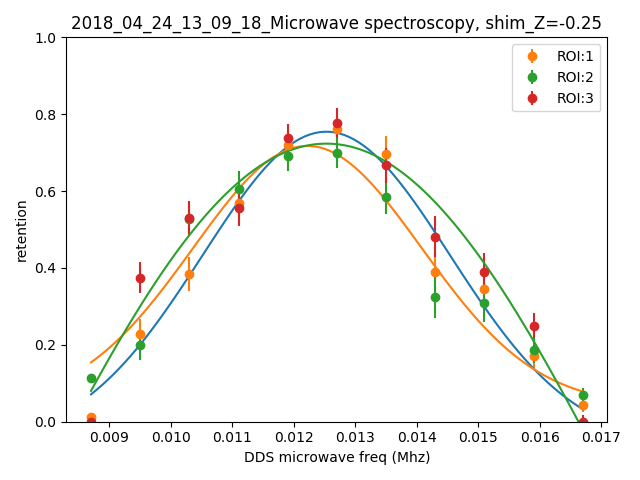

amplitude: 0.817388556396 , x0: 0.0125274753231, sigma:0.00284667669121 
amplitude: 0.6763606269 , x0: 0.0122199785083, sigma:0.00263201677352 
amplitude: 2.67801396669 , x0: 0.0125289645663, sigma:0.007304827298 


<IPython.core.display.Javascript object>


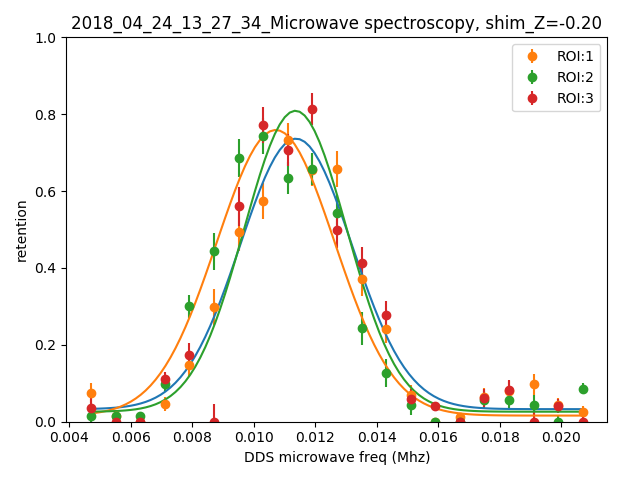

amplitude: 0.703688905421 , x0: 0.0113711870349, sigma:0.00257169783648 
amplitude: 0.743022371055 , x0: 0.010709249322, sigma:0.00271326313457 
amplitude: 0.782954241916 , x0: 0.0113507242633, sigma:0.00236351483269 


<IPython.core.display.Javascript object>


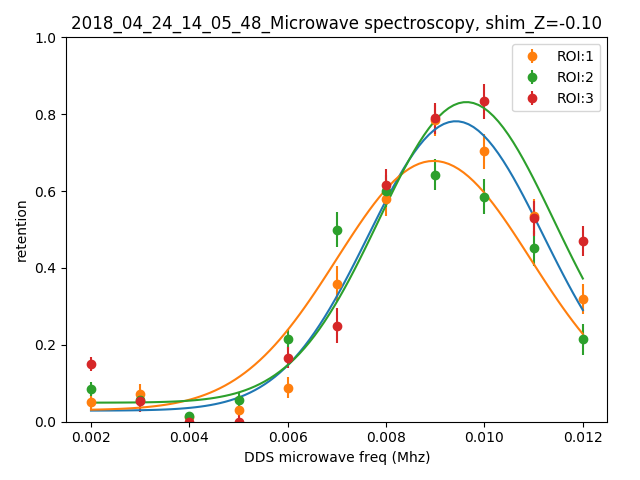

amplitude: 0.752916036052 , x0: 0.00941820266131, sigma:0.00251077898994 
amplitude: 0.648412685779 , x0: 0.00896609065719, sigma:0.00278669774668 
amplitude: 0.782055639513 , x0: 0.00963116522379, sigma:0.00251894664029 


<IPython.core.display.Javascript object>


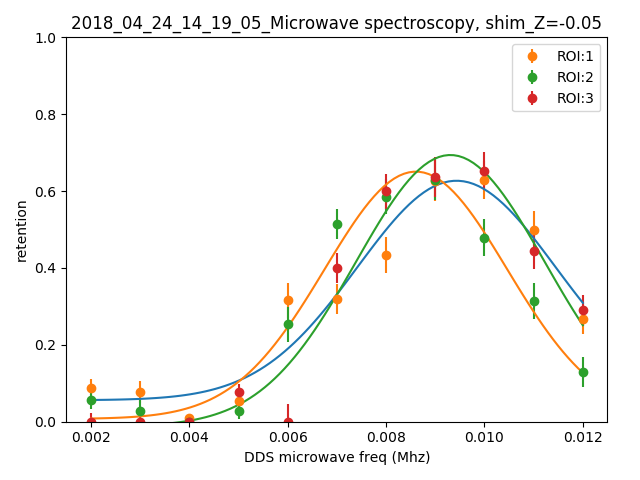

amplitude: 0.570981062206 , x0: 0.00943130313575, sigma:0.00284890223286 
amplitude: 0.643336514331 , x0: 0.00860562110502, sigma:0.0026191315596 
amplitude: 0.706641733962 , x0: 0.00930614047739, sigma:0.00271376966724 


<IPython.core.display.Javascript object>


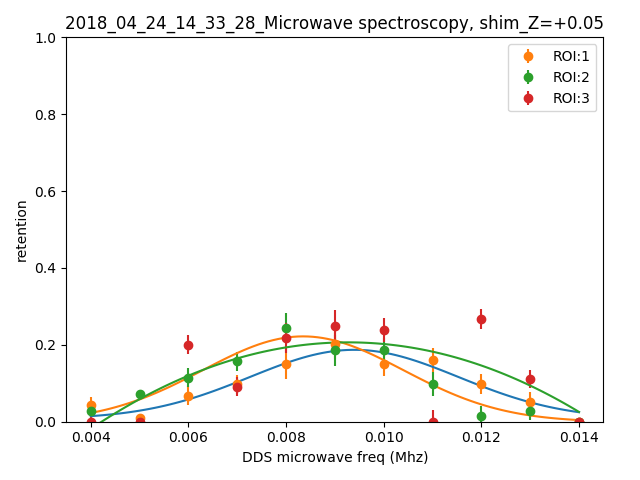

amplitude: 0.180020975934 , x0: 0.00939432512022, sigma:0.0030244872986 
amplitude: 0.222704218565 , x0: 0.00834845073429, sigma:0.00290043775937 
amplitude: 278.372879246 , x0: 0.00927147385819, sigma:0.185416317961 


<IPython.core.display.Javascript object>


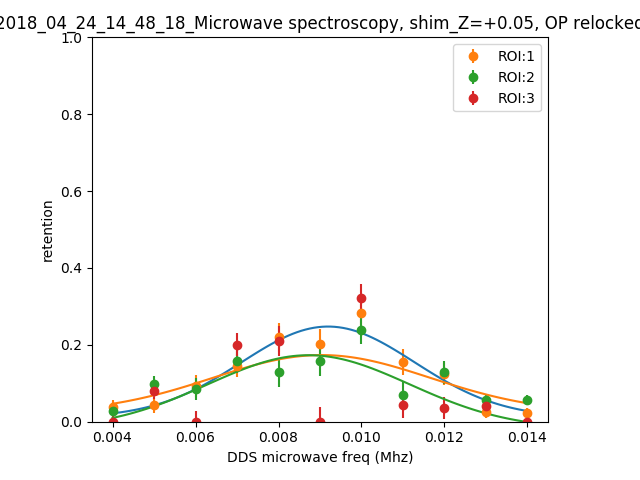

amplitude: 0.236577250442 , x0: 0.00919375118958, sigma:0.00295398007288 
amplitude: 0.150182786962 , x0: 0.00903815663902, sigma:0.00370034295553 
amplitude: 0.19223877551 , x0: 0.00872750861458, sigma:0.00343802506773 


<IPython.core.display.Javascript object>


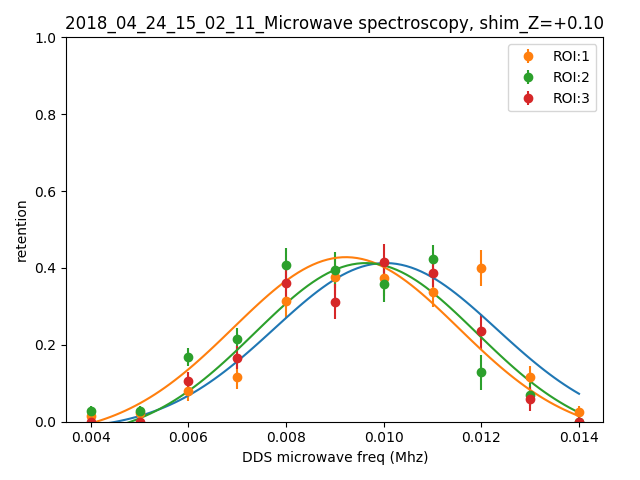

amplitude: 0.436348080008 , x0: 0.0100315779024, sigma:0.00322780292476 
amplitude: 0.468597684472 , x0: 0.00922340327221, sigma:0.00326612937514 
amplitude: 0.461711700398 , x0: 0.00963144805252, sigma:0.00321438617995 


<IPython.core.display.Javascript object>


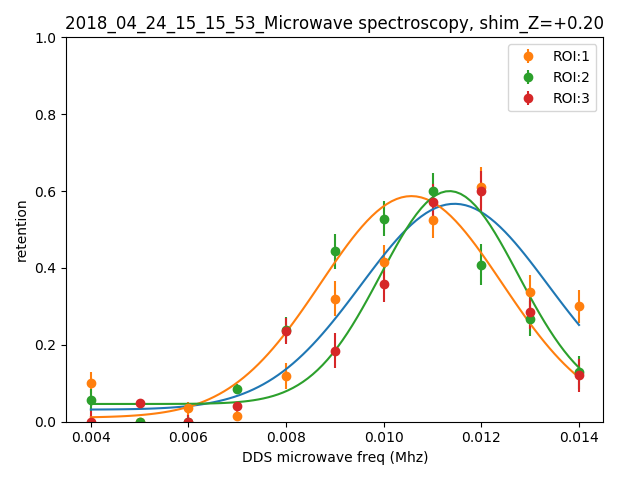

amplitude: 0.535501002023 , x0: 0.0114495839888, sigma:0.00270611911723 
amplitude: 0.57637618779 , x0: 0.0105656408742, sigma:0.00262830652607 
amplitude: 0.553795474844 , x0: 0.0113458270586, sigma:0.00199375134232 


<IPython.core.display.Javascript object>


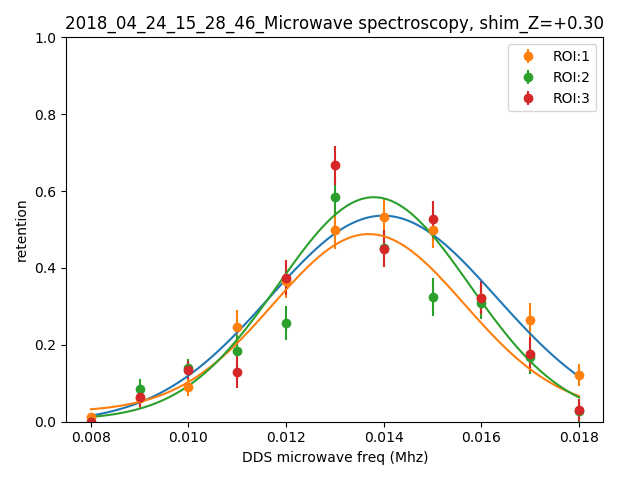

amplitude: 0.539928289491 , x0: 0.0139865100511, sigma:0.00328561243341 
amplitude: 0.462416982798 , x0: 0.0136933766275, sigma:0.00276579343517 
amplitude: 0.579083536962 , x0: 0.013797303042, sigma:0.00277109657525 


<IPython.core.display.Javascript object>


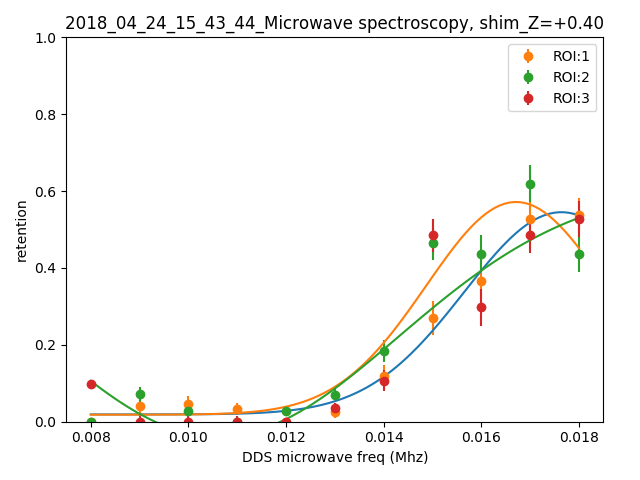

amplitude: 0.526166488056 , x0: 0.0176379815633, sigma:0.00280786317881 
amplitude: 0.553436640183 , x0: 0.0167109460868, sigma:0.00260336809405 
amplitude: -0.657195079837 , x0: 0.0106012758042, sigma:0.00521750241164 


<IPython.core.display.Javascript object>


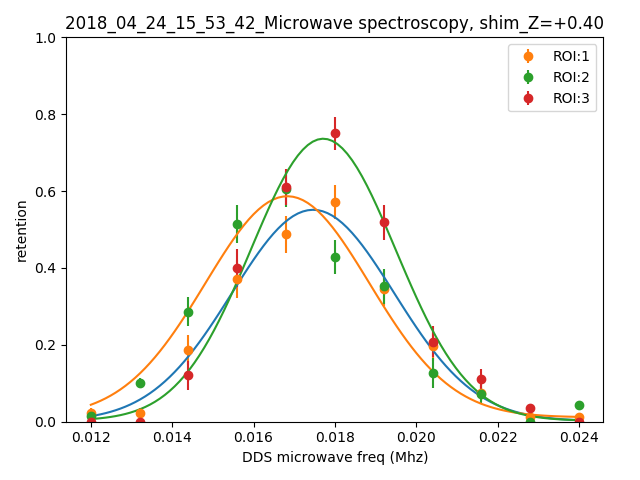

amplitude: 0.549748681604 , x0: 0.0174632116737, sigma:-0.00281707708132 
amplitude: 0.575043489179 , x0: 0.0168316099957, sigma:0.00285085760274 
amplitude: 0.733651718905 , x0: 0.0177133809775, sigma:0.00251712328637 


<IPython.core.display.Javascript object>


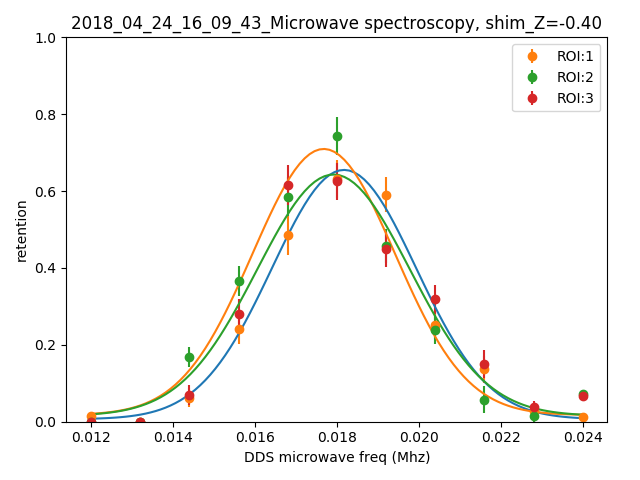

amplitude: 0.648562863366 , x0: 0.0181745569966, sigma:0.00248599334839 
amplitude: 0.692387966155 , x0: 0.0176791323353, sigma:0.00245781961243 
amplitude: 0.627885144649 , x0: 0.0179180591955, sigma:0.0026356371053 


<IPython.core.display.Javascript object>


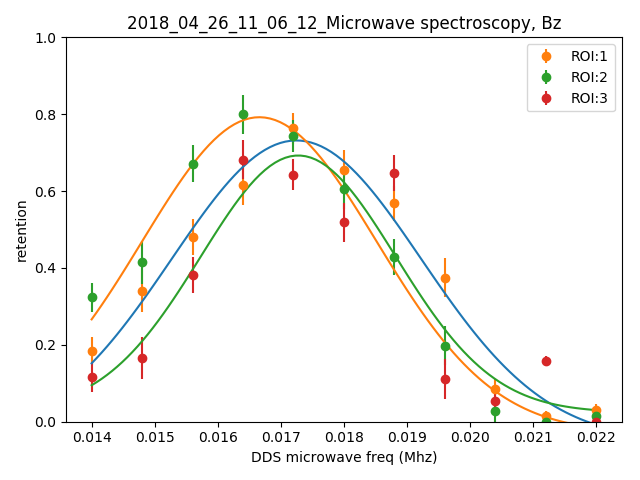

amplitude: 0.783470551614 , x0: 0.0172466125374, sigma:0.00279713097996 
amplitude: 0.821463499236 , x0: 0.0166586800021, sigma:0.00262940300555 
amplitude: 0.668642835686 , x0: 0.0172753691087, sigma:0.00218652275272 


In [99]:
assorted_roi3freqs=[]
assorted_roi2freqs=[]
assorted_roi3perr=[]
assorted_roi2perr=[]
savefig=False
for i in range(0,len(exp_ids)):
    exp_id=assorted['exp_ids'][i]
    q=assorted['qdp_class'][i]
    q.experiments[0]['variable_list']
    xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
    q.get_thresholds()
    retention = q.apply_thresholds()

    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    fig, ax = plt.subplots()
    fit_guesses=[0.5, 0.013, 0.005 , 0]
    fitted_parameters=[]
    for roi in [1,2,3]:
        error=0
        data = []
        reten = []
        err = []
        for e in range(len(np.squeeze(retention['ivar']))):
            data.append(np.squeeze(retention['ivar'])[e][roi])
            reten.append(np.squeeze(retention['retention'])[e][roi])
            err.append(np.squeeze(retention['error'])[e][roi])
        ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
        #guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
        try:
            fit,pcov = curve_fit(gaussian,data,reten,fit_guesses) #gaussian(x,amp,x0,sigma,offset):
        except RuntimeError:
            error=1
        if error is not 1:
            print "amplitude: {} , x0: {}, sigma:{} ".format(fit[0],fit[1],fit[2])
 
            xarray=np.linspace(np.min(data),np.max(data),100)
            yfit=gaussian(xarray, fit[0], fit[1], fit[2], fit[3])
            plt.plot(xarray,yfit)
            if roi==2:
                assorted_roi2freqs.append(fit[1])

    plt.show()
    ax.set_title(exp_id)
    ax.set_ylim(0, 1)
    ax.set_xlabel(xlab)
    ax.set_ylabel('retention')
    ax.legend()
    plt.tight_layout()
    if savefig:
        plt.savefig('{}.pdf'.format(exp_id))

<IPython.core.display.Javascript object>


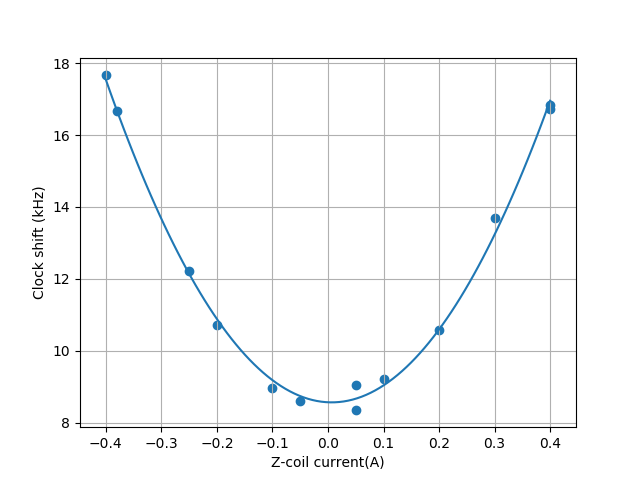

In [100]:
def quadratic(x,A,x0,y0):
    res=y0+A*(x-x0)**2
    return res

Zcurrent=[-0.25,-0.2,-0.1,-0.05,0.05,0.05,0.10,0.20,0.30,0.40,0.40,-0.40,-0.38]
TokHz=1000.0
ydata=TokHz*np.array(assorted_roi2freqs)
# yerror=TokHz*np.array(assorted_roi2perr)
fig, ax=plt.subplots()
ax.scatter(Zcurrent,ydata)
fit_guesses=[0.5,0,8.5]
fit,pcov = curve_fit(quadratic,Zcurrent,ydata,fit_guesses) #gaussian(x,amp,x0,sigma,offset):
xarray=np.linspace(np.min(Zcurrent),np.max(Zcurrent),100)
yfit=quadratic(xarray,fit[0],fit[1],fit[2])
ax.plot(xarray,yfit)
ax.grid()
ax.set_xlabel('Z-coil current(A)')
ax.set_ylabel('Clock shift (kHz)')

In [101]:
print fit[0],fit[1],fit[2]
c=np.sqrt(fit[0]/0.57515)
print '{} G/Amps'.format(c)

54.2458220054 0.00669928545648 8.56391535982
9.71164022434 G/Amps


In [93]:
print c*-0.25
print c*-0.45
print c*-0.125
    

-2.42885317967
-4.37193572341
-1.21442658984


In [95]:
c*0.5*4.2

20.4023667092317

In [97]:
3.7/c

0.38083816994055975